                             OrderedModel Results                             
Dep. Variable:         degradacao_ord   Log-Likelihood:                -1093.4
Model:                   OrderedModel   AIC:                             2219.
Method:            Maximum Likelihood   BIC:                             2296.
Date:                Tue, 11 Nov 2025                                         
Time:                        18:19:16                                         
No. Observations:                 949                                         
Df Residuals:                     933                                         
Df Model:                          13                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
pratica_aceiros                               2.3096      0.796      

C:\Users\Valentine\AppData\Local\Temp\ipykernel_26148\1258857298.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef.values, y=coef.index, palette="coolwarm")


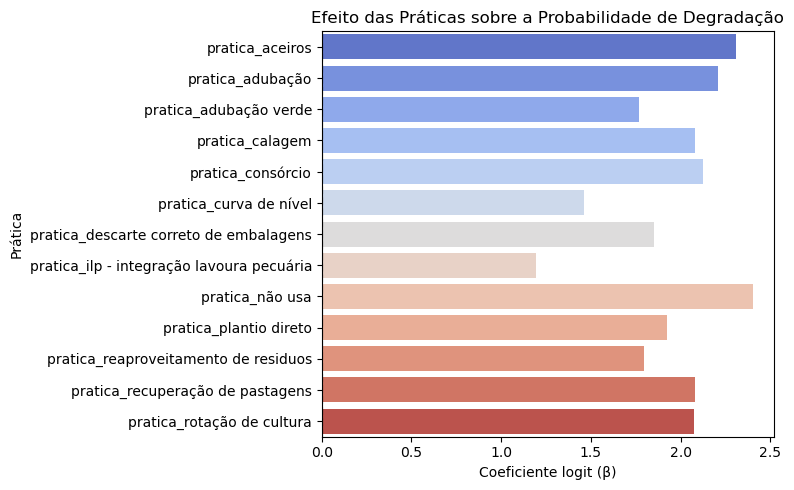

In [3]:
# %% [markdown]
# # Modelo de Regressão Logística Ordinal
# Estima a influência combinada das práticas agrícolas sobre o nível de degradação

# %%
import pandas as pd
import numpy as np
from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.api as sm

# %% [markdown]
# ## 1. Carregar dados (exemplo: práticas sustentáveis)
# Você pode alternar entre o dataset de convencionais e sustentáveis

# %%
file_path = r"C:/Users/Valentine/Artigo_Mapitos/data_clean/07_Codificado/07_Sustentaveis_Degradacao_Linha.csv"
df = pd.read_csv(file_path)

# %% [markdown]
# ## 2. Preparar os dados

# %%
df.columns = df.columns.str.lower()

# Selecionar variáveis de interesse
y = df["degradacao_ord"]
X = df.filter(like="pratica_")

# Remover dummies com pouca variação (constantes ou quase sempre zero)
X = X.loc[:, (X.sum() > 5)]

# %% [markdown]
# ## 3. Ajustar modelo logit ordinal

# %%
model = OrderedModel(
    endog=y,
    exog=X,
    distr="logit"
)

res = model.fit(method="bfgs", disp=False)

# %%
print(res.summary())

# %%
# Interpretação dos coeficientes
# coef > 0 → aumenta a chance de degradação alta
# coef < 0 → reduz a chance (ou indica associação com áreas menos degradadas)
odds_ratios = np.exp(res.params)
odds_ratios.name = "Odds Ratio"
print("\nRazões de chance (Odds Ratios):\n", odds_ratios)

# %% [markdown]
# ## 4. Gráfico visual dos coeficientes

# %%
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
coef = res.params.drop(["0/1","1/2","2/3"])  # remover limiares
sns.barplot(x=coef.values, y=coef.index, palette="coolwarm")
plt.axvline(0, color="black", linestyle="--")
plt.title("Efeito das Práticas sobre a Probabilidade de Degradação")
plt.xlabel("Coeficiente logit (β)")
plt.ylabel("Prática")
plt.tight_layout()
plt.show()


In [5]:
df[['degradacao_ord','qual_o_nivel_de_degradacao_que_predomina_nas_pastagens_']].value_counts().sort_index()


degradacao_ord  qual_o_nivel_de_degradacao_que_predomina_nas_pastagens_
0               nao possui degradacao                                      333
1               pouco degradado                                            384
2               degradacao media                                           206
3               muito degradado                                             26
Name: count, dtype: int64